(1797, 64)


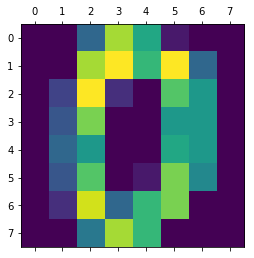

In [2]:
#Principal component analysis using scikit learn
#Load the pre-loaded dataset (digits dataset)
#plot image using matplotlib
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
dataset_digits = load_digits()
print(dataset_digits.data.shape) 
#plt.gray() 
plt.matshow(dataset_digits.images[0]) 
plt.show() 

In [4]:
#Split 20% of the dataset for testing
#Fit logistic regression model and observe the accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
df = pd.DataFrame(dataset_digits.data)
train_X, test_X, train_y, test_y = train_test_split(dataset_digits.data, dataset_digits.target, test_size=0.2, random_state=0)
logistic = LogisticRegression()
logistic.fit(train_X,train_y)
temp=logistic.predict(test_X)
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.95


In [5]:
#PCA Transformation
#number of components
existing_df = df 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(existing_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
#PCA Transformation - Result
existing_2d = pca.transform(existing_df)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
0,-1.259466,21.274883
1,7.957611,-20.768699
2,6.991923,-9.955986
3,-15.906105,3.332464
4,23.306867,4.269061


In [7]:
#Variance
print (pca.explained_variance_ratio_)

[ 0.14890594  0.13618771]


In [9]:
#Fit logistic Regression in transformed dataset
#observe accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
train_X, test_X, train_y, test_y = train_test_split(existing_df_2d, dataset_digits.target, test_size=0.2, random_state=0)
logistic = LogisticRegression()
logistic.fit(train_X,train_y)
temp=logistic.predict(test_X)
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.544444444444


In [14]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix # Confusion Matrix
cnfm = confusion_matrix(temp,test_y)
print(cnfm)

[[26  0  0  0  0  4  4  0  0  0]
 [ 0 15  1  0  2  5  1 13 10  0]
 [ 0  0 12  0  0  1  0  1  3  0]
 [ 0  0 16 24  0  0  0  0  0  9]
 [ 0  3  0  0 27  0 11  1  0  0]
 [ 0  6  4  0  0 13  0  1 12  3]
 [ 1  0  0  0  1  2 28  0  0  0]
 [ 0  3  1  1  0  7  0 22  7  3]
 [ 0  7  0  0  0  4  0  1  3  0]
 [ 0  1  2  4  0  4  0  0  4 26]]
